In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble.forest import RandomForestRegressor

In [9]:
def rmse(logY_pred,logY_act):
    rms=sqrt(mean_squared_error(logY_pred, logY_act))
    return rms

In [10]:
train = pd.read_csv('Data/train_data_hhp.csv')
test = pd.read_csv('Data/test_data_hhp.csv')

train, validation = train_test_split(train,test_size=0.3,random_state=0)

year_2_data = pd.read_csv('Data/train_data_hhp.csv')
year_2_data.drop(['DaysInHospital','Year','ClaimsTruncated','MemberID'], axis=1, inplace=True)

Ytrain = train['DaysInHospital']
Ytest = test['DaysInHospital']#, axis=1, inplace=True)
Yvalidation = validation['DaysInHospital']

train.drop(['DaysInHospital','Year','ClaimsTruncated','MemberID'],axis=1, inplace=True)
test.drop(['DaysInHospital','Year','ClaimsTruncated','MemberID'],axis=1, inplace=True)
validation.drop(['DaysInHospital','Year','ClaimsTruncated','MemberID'],axis=1, inplace=True)

### Scale input

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

col_name=train.columns

year_2_data_scaled = sc.fit_transform(year_2_data)

X_train_scaled = sc.fit_transform(train)
X_test_scaled = sc.fit_transform(test)
X_validation_scaled = sc.fit_transform(validation)

year_2_data_scaled=pd.DataFrame(year_2_data_scaled , columns = col_name)

X_train_scaled=pd.DataFrame(X_train_scaled , columns = col_name)
X_test_scaled=pd.DataFrame(X_test_scaled , columns = col_name)
X_validation_scaled=pd.DataFrame(X_validation_scaled , columns = col_name)

X_train_scaled.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age_05,age_15,age_25,age_35,age_45,age_55,age_65,age_75,age_85,age_MISS,...,DrugCountMin,DrugCountMax,DrugCountMean,DrugCount,labCount_min,labCount_max,labCount_ave,labcount_months,labNull,drugNull
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.142857,0.285714,0.250000,1.000000,0.0,0.0,0.00,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.285714,0.714286,0.500000,0.166667,0.2,0.2,0.20,0.083333,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.2,0.5,0.35,0.166667,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.7,0.7,0.70,0.083333,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.142857,0.142857,0.166667,0.0,0.0,0.00,0.000000,0.0,0.0


### Convert output by logscale


In [12]:
logYtrain=np.log(Ytrain+1)
logYtest=np.log(Ytest+1)
logYvalidation=np.log(Yvalidation+1)

## Training

### Predict 

In [15]:
rf_regr = RandomForestRegressor(n_estimators=100)

In [16]:
rf_regr.fit(X_train_scaled, logYtrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Evaluate

In [17]:
logY_pred_test = rf_regr .predict(X_test_scaled)
logY_pred_train = rf_regr .predict(X_train_scaled)
logY_pred_validation = rf_regr .predict(X_validation_scaled)

#truncated output
logY_pred_test[logY_pred_test < 0]=0
logY_pred_train[logY_pred_train < 0]=0
logY_pred_validation[logY_pred_validation < 0]=0

print('error on training set: ', rmse(logYtrain, logY_pred_train),
     'error on validation set: ', rmse(logYvalidation, logY_pred_validation),
  #   )#,
      'error on testing set: ', rmse(logYtest, logY_pred_test)
    )

error on training set:  0.17628191382166689 error on validation set:  0.4791333608928005 error on testing set:  0.46059365389758494


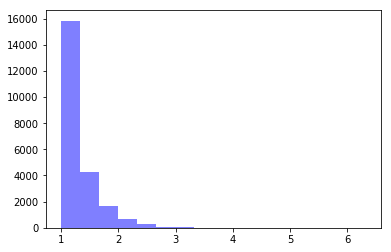

In [18]:
num_bins=16
n, bins, patches = plt.hist(np.exp(logY_pred_validation), num_bins, facecolor='blue', alpha=0.5)
plt.show()

### Feature selection

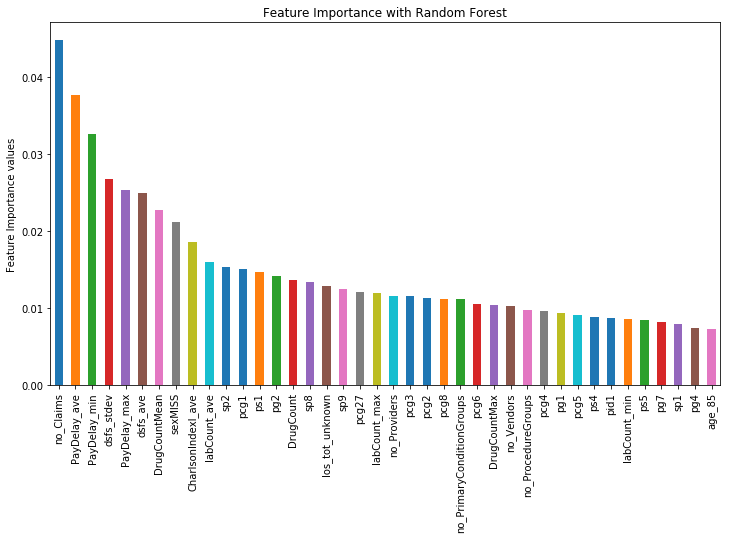

In [19]:
# Plot the top 40 important features
imp_feat_rf = pd.Series(rf_regr.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

#### Remove featurs with 0 importance value

In [20]:
#remove all features with 0 important value
list1=list()
for indx, val in imp_feat_rf.iteritems():
  #print(indx,val)
  if val==0:
    list1.append(indx)
#pd.DataFrame(list1).to_csv("Data/RmvSet1_XGBregr.csv", encoding='utf-8')

In [21]:
X_train_scaled.drop(list1,axis=1, inplace=True)
X_validation_scaled.drop(list1,axis=1, inplace=True)
X_test_scaled.drop(list1,axis=1, inplace=True)
year_2_data_scaled.drop(list1,axis=1, inplace=True)

In [22]:
rf_regr.fit(X_train_scaled,logYtrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
logY_pred_test = rf_regr .predict(X_test_scaled)
logY_pred_train = rf_regr .predict(X_train_scaled)
logY_pred_validation = rf_regr .predict(X_validation_scaled)

Y_pred_train=np.exp(logY_pred_train)-1
Y_pred_test=np.exp(logY_pred_test)-1
Y_pred_validation=np.exp(logY_pred_validation)-1

print('RSME on traing set',rmse(logYtrain, logY_pred_train),
        'RSME on validation set',rmse(logYvalidation, logY_pred_validation),
        'RSME on testing set',rmse(logYtest, logY_pred_test),
     )

RSME on traing set 0.17629644574590594 RSME on validation set 0.47889960856700203 RSME on testing set 0.4601947656779032


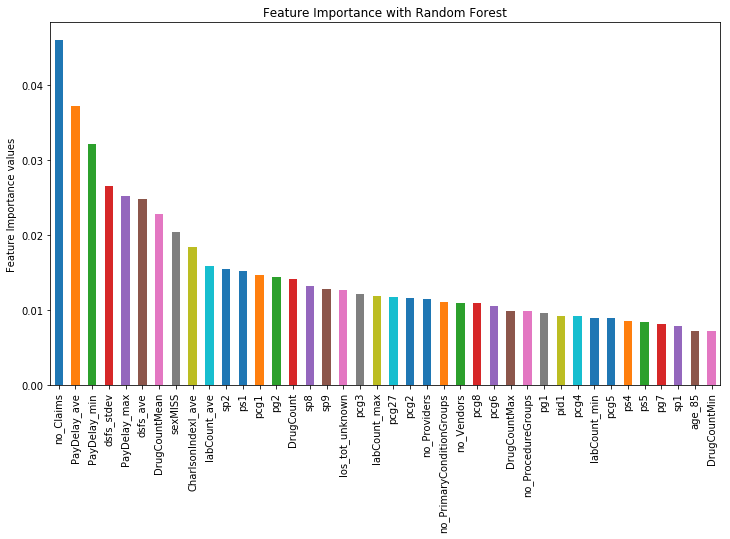

In [24]:
# Plot the top 40 important features
imp_feat_rf = pd.Series(rf_regr.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

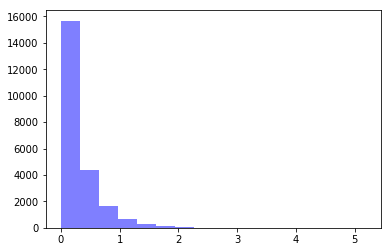

In [25]:
num_bins=16
n, bins, patches = plt.hist(Y_pred_validation, num_bins, facecolor='blue', alpha=0.5)
plt.show()

#### Remove features with high correlation with no_Claims

In [26]:
list0=['no_Providers', 'no_Vendors', 'no_PCPs', 'no_PlaceSvcs','no_Claims',
       'no_Specialities', 'no_PrimaryConditionGroups', 'no_ProcedureGroups']

del list0[4]
list0

['no_Providers',
 'no_Vendors',
 'no_PCPs',
 'no_PlaceSvcs',
 'no_Specialities',
 'no_PrimaryConditionGroups',
 'no_ProcedureGroups']

In [27]:
X_train_scaled.drop(list0,axis=1, inplace=True)
X_validation_scaled.drop(list0,axis=1, inplace=True)
X_test_scaled.drop(list0,axis=1, inplace=True)
year_2_data_scaled.drop(list0,axis=1, inplace=True)

In [28]:
rf_regr.fit(X_train_scaled,logYtrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
logY_pred_test = rf_regr .predict(X_test_scaled)
logY_pred_train = rf_regr .predict(X_train_scaled)
logY_pred_validation = rf_regr .predict(X_validation_scaled)

Y_pred_train=np.exp(logY_pred_train)-1
Y_pred_test=np.exp(logY_pred_test)-1
Y_pred_validation=np.exp(logY_pred_validation)-1


print('RSME on traing set',rmse(logYtrain, logY_pred_train),
        'RSME on validation set',rmse(logYvalidation, logY_pred_validation),
        'RSME on testing set',rmse(logYtest, logY_pred_test),
     )

RSME on traing set 0.1761178941487382 RSME on validation set 0.47883385934862793 RSME on testing set 0.46118889290185733


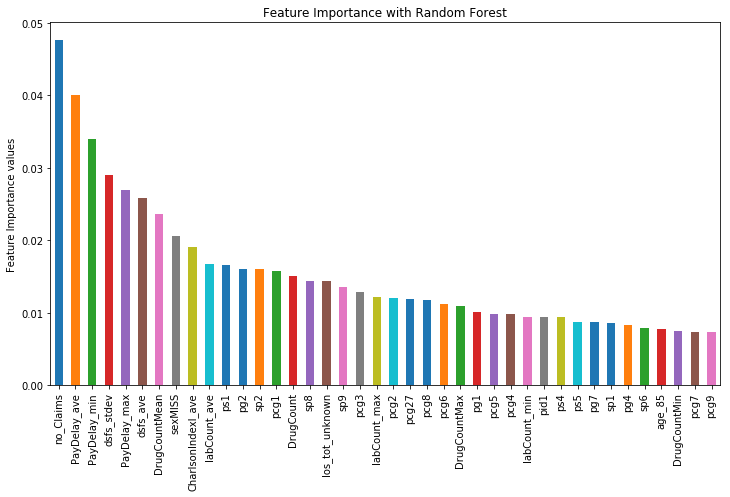

In [30]:
# Plot the top 40 important features
imp_feat_rf = pd.Series(rf_regr.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

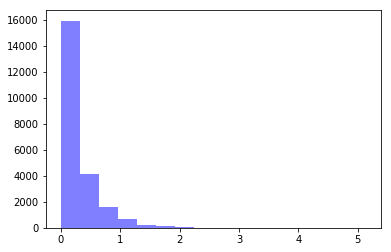

In [31]:
num_bins=16
n, bins, patches = plt.hist(Y_pred_validation, num_bins, facecolor='blue', alpha=0.5)
plt.show()

## Export prediction

In [32]:
logY2_pred=rf_regr.predict(year_2_data_scaled)
logY2_pred[logY2_pred < 0]=0
Y2_pred=np.exp(logY2_pred)-1
Y2_pred=np.exp(logY2_pred)-1
Y3_pred=np.exp(logY_pred_test)-1

Y2_pred= pd.DataFrame(Y2_pred, columns=['Y_pred_RFregr_scaled'])
Y3_pred= pd.DataFrame(Y3_pred, columns=['Y_pred_RFregr_scaled'])
#Y_pred_validation= pd.DataFrame(Y_pred_validation, columns=['Y_pred_LGBM'])

pd.DataFrame(Y2_pred).to_csv("Data/Y2_pred_RFregr_scaled.csv", encoding='utf-8')
#pd.DataFrame(Y_pred_validation).to_csv("Data/Y_pred_validation_LGBM.csv", encoding='utf-8')
pd.DataFrame(Y3_pred).to_csv("Data/Y3_pred_RFregr_scaled.csv", encoding='utf-8')